In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#FatosGeração (ID empreendiemnto) > fatodadosmetereologicos (vento, precip, etc) > dimempreendimentos (tipogeração)

#dim_empreendimentos -> id;NomEmpreendimento;SigUFPrincipal;SigTipoGeracao;NomFonteCombustivel
#fato_dados_metereologicos -> id;Data;Hora UTC;precipTotalHorario;ventoVeloHoraria;tempAr;radGlobal;umidRelAr;id_regiao
#fato_geracao -> id;DatGeracaoConjuntoDados;MdaPotenciaFiscalizadaKw;MdaPotenciaOutorgadaKw;Id_empreendimento
#id;UF;latitude;longitude;altitude
#Pegar empreendimento (id) > Pegar todos os dados meterologicos (preciptação, vento, temp...) > Pegar qual o TipoGeração na região

dim_regiao = pd.read_csv(
    "data/dim_regiao.csv",
    delimiter=";",
    encoding="UTF-8")

dim_empreendimentos = pd.read_csv(
    "data/dim_empreendimento.csv",
    delimiter=";",
    encoding="UTF-8")

fato_dados_metereologicos = pd.read_csv(
    "data/fato_dados_meteorologicos.csv",
    delimiter=";",
    encoding="UTF-8")

fato_geracao = pd.read_csv(
    "data/fato_geracao.csv",
    delimiter=";",
    encoding="UTF-8",
    decimal=',')

#sklearn.ensemble.HistGradientBoostingClassifier


In [16]:
colunas_csv1 = list(fato_dados_metereologicos.columns)
coluna_csv2 = 'SigUFPrincipal'
dados_combinados = pd.merge(fato_dados_metereologicos[colunas_csv1], dim_regiao[[coluna_csv2]], left_index=True, right_index=True)

#Tratando dados decimais para virarem tipo float
#dados_combinados = pd.merge(fato_dados_metereologicos, dim_regiao, left_on='id_regiao', right_on='id')

dados_combinados['precipTotalHorario'] = dados_combinados['precipTotalHorario'].astype(str)
dados_combinados['precipTotalHorario'] = dados_combinados['precipTotalHorario'].str.replace(',', '.')
dados_combinados['precipTotalHorario'] = dados_combinados['precipTotalHorario'].astype(float)

dados_combinados['ventoVeloHoraria'] = dados_combinados['ventoVeloHoraria'].astype(str)
dados_combinados['ventoVeloHoraria'] = dados_combinados['ventoVeloHoraria'].str.replace(',', '.')
dados_combinados['ventoVeloHoraria'] = dados_combinados['ventoVeloHoraria'].astype(float)

dados_combinados['tempAr'] = dados_combinados['tempAr'].astype(str)
dados_combinados['tempAr'] = dados_combinados['tempAr'].str.replace(',', '.')
dados_combinados['tempAr'] = dados_combinados['tempAr'].astype(float)

dados_combinados['radGlobal'] = dados_combinados['radGlobal'].astype(str)
dados_combinados['radGlobal'] = dados_combinados['radGlobal'].str.replace(',', '.')
dados_combinados['radGlobal'] = dados_combinados['radGlobal'].astype(float)

In [ ]:
siglasUF = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']


dados_combinados.head()


KeyError: 'precipTotalHorario'

In [9]:

dados_combinados_copia = dados_combinados
dados_combinados_copia2= dados_combinados_copia.dropna()



In [10]:
scaler = StandardScaler()

X = dados_combinados_copia2[['precipTotalHorario','ventoVeloHoraria','tempAr','radGlobal','umidRelAr']]


# Aplicar a escala aos dados
X = scaler.fit_transform(X)



c:\Users\Orlisio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.21868131868131868


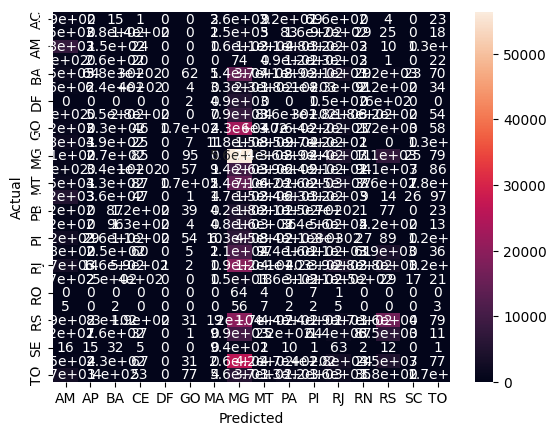

In [11]:
#X = dados_combinados_copia2[['precipTotalHorario','ventoVeloHoraria','tempAr','radGlobal','umidRelAr']]
y = dados_combinados_copia2['UF']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [ ]:
# Filtrar as linhas que possuem valores NaN
linhas_com_nan = fato_dados_metereologicos[fato_dados_metereologicos.isna().any(axis=1)]

# Mostrar as linhas com valores NaN
linhas_com_nan


,id,Data,Hora UTC,precipTotalHorario,ventoVeloHoraria,tempAr,radGlobal,umidRelAr,id_regiao
0,0,2022/01/01,0000 UTC,0,"1,9","19,2",NaN,89.0,0
1,1,2022/01/01,0100 UTC,",4","2,1",19,NaN,92.0,0
2,2,2022/01/01,0200 UTC,0,"2,6","19,1",NaN,91.0,0
3,3,2022/01/01,0300 UTC,0,"2,8","18,8",NaN,91.0,0
4,4,2022/01/01,0400 UTC,0,"1,3","18,5",NaN,92.0,0
...,...,...,...,...,...,...,...,...,...
3437903,3437903,2022/12/31,0400 UTC,0,"5,6",17,NaN,90.0,566
3437904,3437904,2022/12/31,0500 UTC,0,"5,5","16,7",NaN,93.0,566
3437905,3437905,2022/12/31,0600 UTC,0,3,"16,2",NaN,94.0,566
3437906,3437906,2022/12/31,0700 UTC,0,4,"15,7",NaN,95.0,566


In [25]:
mergeClima = pd.merge(fato_dados_metereologicos, dim_regiao, left_on='id_regiao', right_on='id')
mergeEnergia = pd.merge(fato_geracao, dim_empreendimentos, left_on='Id_empreendimento', right_on='id')
amostra = mergeClima.sample(frac=0.2, random_state=42)
mergeTotal = pd.merge(amostra, mergeEnergia, left_on='UF', right_on='SigUFPrincipal')


# Passo 1: Juntar os DataFrames
""" df = pd.merge(dim_regiao, dim_empreendimentos, on='id')
df = pd.merge(df, fato_dados_metereologicos, on='id_regiao')
df = pd.merge(df, fato_geracao, on='id') """

# Passo 2: Pré-processamento dos dados
# Verifique e lide com valores ausentes, codifique variáveis categóricas, etc.

# Passo 3: Dividir os dados em conjuntos de treinamento e teste


In [ ]:
X = df[['precipTotalHorario', 'ventoVeloHoraria', 'tempAr', 'radGlobal', 'umidRelAr', 'MdaPotenciaOutorgadaKw']]
y = df['SigTipoGeracao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Passo 5: Avaliar o desempenho do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)